# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

## Getting Started
In this project, I evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, I make a cursory investigation about the Boston housing data and provide your observations.

### Implementation: Calculate Statistics

In the code cell below, I implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
minimum_price = min(prices)

maximum_price = max(prices)

mean_price = np.mean(prices)

median_price = np.median(prices)

std_price = np.std(prices)

# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **

All else being equal, I expect an increase in housing prices from higher RM, and a decrease in housing prices from a higher LSTAT and PTRATIO.

It seems to me that a house with more rooms will generally be larger, and cost more to build and buy. 

A higher LSTAT ratio means that there is a larger percentage of lower class people living in the neighbourhood. One would expect the housing prices to be comparatively lower, since the lower class people have less income and thus would have to live in a cheaper area. Their presence may also drive down housing prices, since wealthier people will likely want to avoid these areas. 

Finally, a higher PTRATIO means there are less students for every teacher. One would expect public schools to have larger class sizes, and smaller, elite private schools to have a lower student to teacher ratio. It goes without saying that a higher student to teacher ratio would also imply that the school itself is better, and thus drive up housing prices in the area since parents want their kids to get the best education available.

----

## Developing a Model
In this second section of the project, I develop the tools and techniques necessary for a model to make a prediction.

### Implementation: Define a Performance Metric

For the `performance_metric` function in the code cell below, I implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    score = r2_score(y_true, y_predict)
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**

The short answer is that we don't know yet, but we can not that the model has an $R^2$ value of 0.923 which is quite good. However, this was calculated using a sample of only 5, so we can't be too confident about the results. Furthermore, it also depends on the method/model used. For example, in a least squares regression $R^2$ is monotically increasing; meaning that as more variables are added, $R^2$ always either remains constant or increases.

### Implementation: Shuffle and Split Data

For the code cell below, I implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **

Splitting a dataset into training and testing subsets gives you a way to validate your model. For example, if one had no test data, there would be no way to determine the model's performance, other than using the data that the model was trained on (which obviously would systematically overestimate the performance of the model).

----

## Analyzing Model Performance
In this third section of the project, I take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

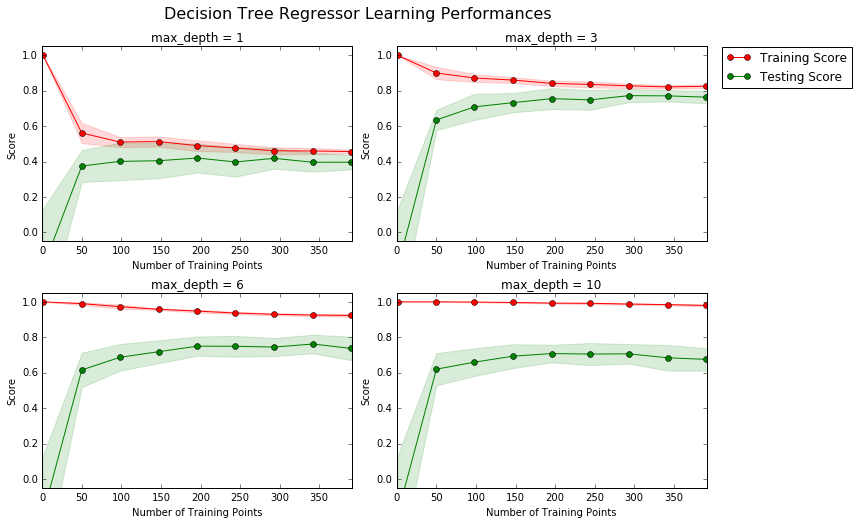

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

Suppose we choose the third graph, with a maximum depth of 6. There is a clear trend in that as more training points are added, the testing score generally increases while the training score decreases. As a general rule, adding more training data to a model should improve its performance. However, it seems as if performance starts to level off around 200 points, and fluctuates by chance afterwards. We must make a tradeoff between the computing power required to model the extra points, and accuracy, and since the gains seem to be minimal (or even nonexistent), adding more points does not seem like it will benefit the model.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation.

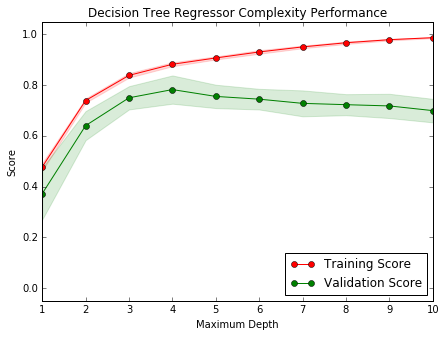

In [7]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **

When the model has a depth of 1, it's suffering from high bias. We know this because as the tree becomes 'deeper', variance increases and bias decreases because the model becomes more flexible. Also simply note that the difference between training and validation score is smallest at a depth of one, showing that the error from variance is lower, and so bias is a larger contributor to error.

When the model is trained with a depth of 10, it's suffering from high variance - this becomes apparent when one observes the shape of the training and validaiton scores. At a depth of 10, the curves fit the classic case when the model is overfit: note how the training score becomes very high as the validation score drops.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

From looking at the graph above, the optimal depth appears to be 4. This is because this is where the validation score is maximized. It is also happens to be a pretty simple model (compared to say, a depth of 10), and so will still be interpretable by the layman.

-----

## Evaluating Model Performance
In this final section of the project, I construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

Grid search is a way to quickly test out different parameters that one thinks may work well when fitting a model. For example, when deciding the depth of a decision tree, one may try out different depths at random, until they find a good result. Alternatively, they could automatically search through a list of values, and then choose from there. This is essentially what grid-search does. It fits several models, and returns a *grid* of the different results. From this grid, the machine learning practitioner can then use their best judgement to pick the best model.

A more concise but technical description would be that grid search performs hyperparameter optimization by searching through a predefined set of parameters given to it.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

K-fold cross validation is a technique for accessing the accuracy of a model. It works by partitioning a dataset into *k folds*, where a single fold is retained as a *testing (or validation) set*, and the model is trained on the remaining *k-1 folds*. The process is repeated for every single one of the folds, such that the entire set of data is checked against.

K-fold validation must be used in conjunction with grid search, because it protects against overfitting. Consider a concrete example when you're fitting a decision tree: without cross validation, grid search will most likely pick an incredibly high depth for the leaves, since there's won't be any test sets to check against for overfitting. Another advantage to k-fold cross validation (as opposed to a simple split of data) is that it returns the average performance across the entire set of data, so it's likelier to give you a more accurate view of the performance of the model in question.

### Implementation: Fitting a Model

For the `fit_model` function in the code cell below, I implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [8]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    regressor = DecisionTreeRegressor(random_state=10)

    params = {'max_depth':list(range(1,10))}

    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **

The optimal depth is 4, which is the same as my prediction from earlier.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [10]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $406,933.33
Predicted selling price for Client 2's home: $232,200.00
Predicted selling price for Client 3's home: $938,053.85


**Answer: **

Based on the model, client 1, 2, and 3 should sell their houses for \$316718, \$233226, and \$937054 respectively. The predictions earlier based on common sense seem to hold - a higher number of rooms indicated higher selling prices, higher poverty levels indicated lower selling prices, and a lower ratio of students to teachers indicated higher house prices.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [11]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  


**Answer: **

The applicability of the model really depends on what it's being used for. Suppose the model is being used to predict housing prices in general across America. I would say that the model shouldn't be used, but the methodology to create the model is sound.

A couple reasons why the model shouldn't be used include:
* The data was collected in 1978, and housing prices have risen dramatically since then across America. 
* Rural and Urban areas vary drastically in housing prices.